# Kalman filter

## Introduction

Kalman filters represent a powerful and versatile algorithm in the realm of predictive analytics and signal processing. They play a pivotal role in the realms of sensor fusion and autonomous vehicle technology, enabling these advanced systems to accurately navigate and interact with their environments. By efficiently processing noisy data from various sensors, Kalman filters help in creating a reliable and coherent understanding of the vehicle's state and surroundings, critical for safe and efficient operation.


### Basic Concept and Operation

The essence of the Kalman filter lies in its recursive algorithm, which estimates the state of a dynamic system by merging mathematically predictions based on previous states with new measurements from multiple sensors. This process involves two key steps: prediction of the next state and updating this prediction with fresh, albeit noisy, sensor data. In the context of autonomous vehicles, this could mean integrating data from GPS, radar, lidar, and cameras to estimate its own and other object's precise location, velocity, and orientation.

### Kalman Filter Steps

This iterative process is base in the following steps:

1. **State Prediction:** Utilizes models of vehicle dynamics to forecast future states based on current estimates. This is crucial for planning the vehicle's trajectory.

2. **Measurement Update:** Integrates new sensor data to refine state estimates. This is where sensor fusion comes into play, as data from disparate sources are combined to improve accuracy.

3. **Error Covariance Estimation:** Adjusts the confidence level in the predictions, taking into account predictions and sensor uncertainty.Applications in Sensor Fusion and Autonomous Vehicles

The following image exemplifies of the recursive nature of the kalman filter

![kalman-flow](https://github.com/udacity/nd013-c2-fusion-exercises/assets/27258035/87d4e540-c838-4622-93bc-1a4cededa9da)

### Applications in Sensor Fusion and Autonomous Vehicles

Kalman filters are integral to several aspects of autonomous vehicle technology, including but not limited to:

- **Real-time positioning and navigation:** Combining GPS, inertial measurements and vehicles odometry.

- **Object tracking and environment mapping:** Using radar, lidar and camera data to identify and track other vehicles, pedestrians, and obstacles.

- **Speed and direction control:** By fusing wheel encoder readings and inertial measurements to ensure smooth and precise movement.

### Advantages and Challenges

The adaptability and efficiency of Kalman filters in handling noisy and uncertain data make them invaluable for autonomous vehicles, offering real-time performance with relatively low computational requirements. However, the primary challenge lies in their assumption of linearity and Gaussian noise, which might not always hold true in complex driving scenarios. Advanced versions, like the **Extended Kalman Filter** and **Unscented Kalman Filter**, address some of these issues but at the expense of increased complexity.

## Kalman Filter Process Flow

As mentioned before, the kalman filter is a iterative process of updating the state of the object to be tracked using a predition or **Motion Model** and correcting this prediction using sensor measurements and a **Observation Model**.

Before we delve into the equations of the Kalman Filter, let's first understand the states and inputs that describe the vehicle's motion.

State track ($x$):

$$
\textit{\textbf{x}} = \begin{bmatrix}
p_x  \\
p_y \\
v_x \\
v_y 
\end{bmatrix} 
$$

- $p_x$: The x-coordinate of the vehicle's position in the 2D plane.
- $p_y$: The y-coordinate of the vehicle's position in the 2D plane.
- $v_x$: The velocity of the vehicle in the x coordinate.
- $v_y$: The velocity of the vehicle in the y coordinate.

### Prediction Step

The prediction step is built upon a mathematical foundation that models the dynamics of the system it's applied to—in this case, an autonomous vehicle or objects to track. The key components of this foundation are the state transition model or motion model, which predicts the next state based on the current state, and the control input model, which incorporates known control inputs into the prediction.

The state transition model ($\textbf{F}$) describes how the state of the autonomous vehicle evolves over time without considering external inputs. It's a crucial element in forecasting the vehicle's future location, velocity, and the state variables $\textit{\textbf{x}}$. This model's accuracy directly influences the prediction step's effectiveness, as it determines how well the Kalman filter can anticipate the system's behavior.

The process noise ($\textbf{Q}$) represents the uncertainty in the state transition and control input models. Including this in the prediction accounts for the inherent unpredictability in how the vehicle and its environment might behave, adding a layer of robustness to the forecasted state.

The mathematical equations for our kalman filter is:

$$
\textit{\textbf{x}}^- =  \textbf{F}\textit{\textbf{x}}^+ + \textbf{B}\textit{\textbf{u}}
$$

$$
\textbf{P}^- =  \textbf{F}\textbf{P}^+\textbf{F}^\textbf{T} + \textbf{Q} 
$$

If the model doesn't have a control input (as in our tracking execersice). The Kalman filter can be simplified to:

$$
\textit{\textbf{x}}^- =  \textbf{F}\textit{\textbf{x}}^+
$$

$$
\textbf{P}^- =  \textbf{F}\textbf{P}^+\textbf{F}^\textbf{T} + \textbf{Q} 
$$


### Update Step

The measurement update phase is where the Kalman filter uses new data from the vehicle's sensors (e.g., radar, lidar, cameras) to correct or update its state estimate. This phase heavily relies on the measurement model ($\textbf{H}$), which relates the true state of the vehicle to the observed measurements and depends on the sensors that produced the observation. 

Initially, the Kalman filter calculates the innovation or residual $\gamma$ that represents the difference between the actual measurements received from sensors $\textbf{z}$ and the measurements predicted by the state estimate $\textbf{H}\textit{\textbf{x}}^-$. This term quantifies the discrepancy between predicted and observed states, providing a critical feedback mechanism for correction. In the update step $\gamma$ it directly influences how the state estimate is corrected. A larger $\gamma$ suggests a significant deviation between the prediction and the actual measurement, signaling a need for a substantial correction to the predicted state.

Afterwards, the Covariance of the Innovation $\textbf{S}$ is calculated. It measures the uncertainty associated with the innovation or residual $\gamma$, incorporating both the predicted state's uncertainty ($\textbf{P}^-$) and the measurement noise ($\textbf{R}$).

The mathematical formulation of the update step includes:

- Calculation of the Innovation or Residual:

$$
\gamma = \textbf{z} - \textbf{H}\textit{\textbf{x}}^-
$$

- Calculation of Covariance of the Innovation or Residual:

$$
\textbf{S} = \textbf{H}\textbf{P}^-\textbf{H}^\textbf{T} + \textbf{R} 
$$

- Calculation of the Kalman Gain:

$$
\textbf{K} = \textbf{P}^-\textbf{H}^\textbf{T}\textbf{S}^{-1}  
$$

- Update of the state prediction:

$$
\textit{\textbf{x}}^+ = \textit{\textbf{x}}^- + \textbf{K}\gamma
$$

- Update of the covariance prediction:

$$
\textbf{P}^+ = (\textbf{I} - \textbf{KH})\textbf{P}^-
$$


### Predict-Update Step Implementation

Let's implement the predict-update steps of a Kalman Filter with the equations above:

In [1]:
## General imports

import math

from IPython.display import HTML
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import scipy.stats as stats

from tools.simulators import CarSimulator
import tools.plot_tools as plot_tools
%matplotlib inline

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
class KalmanFilter:
    '''Kalman filter class'''
    def __init__(self, dim_state=1, 
                       dim_meas=1):

        self.x = np.zeros((dim_state, 1)) # state
        self.P = np.eye(dim_state) # uncertainty covariance
        self.Q = np.eye(dim_state) # process noise covariance
        self.F = np.eye(dim_state) # system matrix
        self.H = np.zeros((dim_meas, dim_state)) # measurement matrix
        self.R = np.eye(dim_meas)               # measurement uncertainty
        
    def predict(self, F = None, Q=None):
        
        if F is None:
            F = self.F
        if Q is None:
            Q = self.Q
        
        x = self.x
        P = self.P

        ##################################
        # TODO: Implement prediction step
        ##################################
        self.x = F@x # state prediction
        self.P = F@P@F.transpose() + Q # covariance prediction
        return self.x, self.P # Should return state prediction and covariance of prediction

    def update(self, z, R=None, H=None):
        # update state and covariance with associated measurement
        if H is None:
            H = self.H
        if R is None:
            R = self.R
        
        x = self.x
        P = self.P
        I = np.eye(x.shape[0])

        # Calculate residual
        gamma = z - H@x

        # Calculate covariance of residual
        S = H@P@H.transpose() + R

        # Calculate Kalman gain
        K = P@H.transpose()@np.linalg.inv(S) # Kalman gain
        
        # Update prediction
        self.x = x + K@gamma

        # Update covariance
        self.P = (I - K@H) @ P # covariance update
        return self.x, self.P
    
## Test our kalman filter.
np.random.seed(4)

# Initial state of the filter
x0 = np.array([[0],
               [0]]) # Initial state
P0 = np.array([[5**2, 0],
               [0, 5**2]])  # Initial covariance

## Models
F = np.array([[1,1],
              [0,1]]) # Motion or transition model
H = np.array([[1,0]]) # Measurement model


## Noise
sigma_z = 1 # measurement noise
Q = np.array([[0, 0],
              [0, 0]]) # Process noise covariance
R = np.array([[sigma_z**2]]) # measurement covariance


# Kalman filter
KF = KalmanFilter(dim_state=2, dim_meas=1)
KF.x = x0
KF.P = P0
KF.Q = Q
KF.H = H
KF.R = R

results = []
# Create simulated run
for i in range(100):

    # prediction
    x_minus, P_minus = KF.predict() # predict to next timestep

    # measurement generation
    z = np.array([[i + np.random.normal(0, sigma_z)]]) # generate noisy measurement

    # update
    x_plus, P_plus = KF.update(z) # update with measurement

    results.append([x_minus, P_minus, z, x_plus, P_plus])

df = pd.DataFrame(results, columns=["x-","P-", "z", "x+", "P+"])
df

x-  \
0                   [[0.0], [0.0]]   
1   [[0.04861702609898034], [0.0]]   
2    [[0.7600554119513568], [0.0]]   
3    [[0.8403302991032575], [0.0]]   
4    [[1.5465848063280232], [0.0]]   
..                             ...   
95    [[47.02583014718463], [0.0]]   
96      [[47.530801175041], [0.0]]   
97   [[48.025168243312045], [0.0]]   
98    [[48.52295860588925], [0.0]]   
99    [[49.01298963168389], [0.0]]   

                                            P-                        z  \
0                   [[25.0, 0.0], [0.0, 25.0]]  [[0.05056170714293955]]   
1     [[0.9615384615384609, 0.0], [0.0, 25.0]]    [[1.499951333237829]]   
2     [[0.4901960784313724, 0.0], [0.0, 25.0]]    [[1.004091068893135]]   
3    [[0.32894736842105254, 0.0], [0.0, 25.0]]    [[3.693598508291312]]   
4    [[0.24752475247524747, 0.0], [0.0, 25.0]]     [[3.58169847997309]]   
..                                         ...                      ...   
95  [[0.010521885521885524, 0.0], [0.0, 25.0]]    [[95.52324766251046]]   
96  [[0.010412328196584759, 0.0], [0.0, 25.0]]    [[95.50418148006355]]   
97  [[0.010305028854080795, 0.0], [0.0, 25.0]]    [[96.82853539038132]]   
98  [[0.010199918400652798, 0.0], [0.0, 25.0]]    [[97.05563140058969]]   
99  [[0.010096930533117936, 0.0], [0.0, 25.0]]    [[99.28086467541812]]   

                                x+                                          P+  
0   [[0.04861702609898034], [0.0]]    [[0.9615384615384609, 0.0], [0.0, 25.0]]  
1    [[0.7600554119513568], [0.0]]    [[0.4901960784313724, 0.0], [0.0, 25.0]]  
2    [[0.8403302991032575], [0.0]]   [[0.32894736842105254, 0.0], [0.0, 25.0]]  
3    [[1.5465848063280232], [0.0]]   [[0.24752475247524747, 0.0], [0.0, 25.0]]  
4    [[1.9503772018925205], [0.0]]   [[0.19841269841269837, 0.0], [0.0, 25.0]]  
..                             ...                                         ...  
95      [[47.530801175041], [0.0]]  [[0.010412328196584759, 0.0], [0.0, 25.0]]  
96   [[48.025168243312045], [0.0]]  [[0.010305028854080795, 0.0], [0.0, 25.0]]  
97    [[48.52295860588925], [0.0]]  [[0.010199918400652798, 0.0], [0.0, 25.0]]  
98    [[49.01298963168389], [0.0]]  [[0.010096930533117936, 0.0], [0.0, 25.0]]  
99   [[49.515467391017495], [0.0]]   [[0.00999600159936026, 0.0], [0.0, 25.0]]  

[100 rows x 5 columns]

### Motion and Observation model definition

A motion model, also known as a state transition model, mathematically describes how a vehicle's state (e.g. position, velocity, acceleration) evolves over time due to its inherent dynamics and external forces. It provides the theoretical basis for predicting the vehicle's future position and motion characteristics based on its current state and control inputs.

### Example in one dimension


Let's use the Kalman Filter in a one dimensional example. For this we will asume the 1-D kinematics of the vehicle using a simple car movement simulator provided by us. This simulator uses the **Constant velocity model** where:

$$p_{x_{t}} = p_{x_{t-1}} +  v_{x}\Delta t + \nu$$
$$ \nu \sim \mathcal{N}(0, \delta)$$

In this case the state is:

$$\textbf{x} =
\begin{bmatrix}
p_x \\
v_x
\end{bmatrix} 
$$

Then the update step can be formulated as:

$$
\begin{bmatrix}
p_{x_{t}} \\
v_{x_{t}}
\end{bmatrix} = 
\begin{bmatrix}
1 & \Delta t \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
p_{x_{t-1}} \\
v_{x_{t-1}}
\end{bmatrix}
$$

Giving:

$$ \textbf{F} = 
\begin{bmatrix}
1 &   \Delta t \\
0 &  1 
\end{bmatrix}$$

For this filter we will asume that our obsertations are the position of the vehicle, then:

$$\textbf{z} = p_x $$

Therfore:

$$\textbf{z} =
\begin{bmatrix}
1 & 0
\end{bmatrix} 
\begin{bmatrix}
p_{x} \\
v_{x}
\end{bmatrix}
$$

Giving:

$$ \textbf{H} = 
\begin{bmatrix}
1 & 0
\end{bmatrix} 
$$

#### Python example simulation


To illustrate the functionality of the filter, we have developed a simple simulation of a car that moves at a constant speed along the X-axis. This simulation is encapsulated within the `CarSimulator` class. Upon initialization, this class requires the car's starting position, its velocity, a process standard deviation to introduce randomness into the car's movement, and a measurement standard deviation to simulate the noise found in sensor readings.

The simulator includes a `simulate_step` function for ease of use. This function requires the number of steps to simulate and the time increment $\Delta t$ for each step's movement calculations. It returns both the actual positions of the car over time (ground truths) and the measurements from the virtual sensor.

In our example, we will utilize these sensor readings with a Kalman filter to evaluate its performance. Specifically, we will compare the filter's output against the ground truth positions.

Text(0, 0.5, 'Postition (m)')

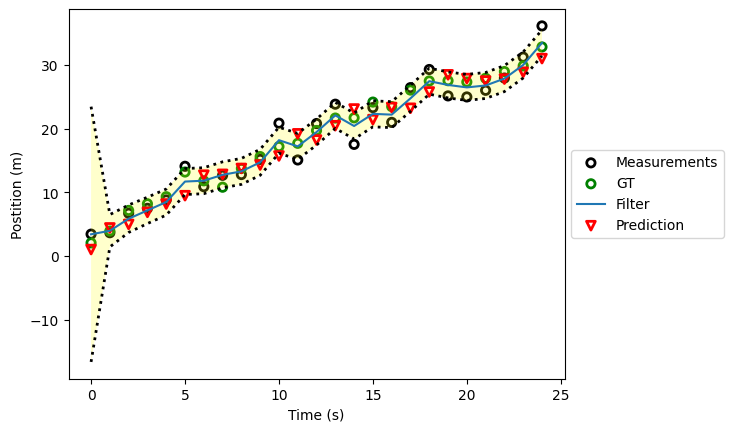

In [3]:
# Define simulatioon parameters
dt = 1.0 # time step


# Define our Kalman filter

dim_state = 2 # x,v_x
dim_meas = 1 # As we assume we are using a radar or a 
             # sensor that give us the x position of the object

process_std = math.sqrt(2)  # Process noise standard deviation
sensor_std = math.sqrt(4.5) # measurement noise standard deviation

x0 = np.array([[0.0],   # Intial state x=0 m, v_x = 1.0 m/s
               [1.0]]) 

P0 = np.array([[400, 0], # Covariance of the uncertainty 
              [0, 0]])

# Define motion model
F = np.array([[1, dt], # Transition model
              [0, 1]]) 

Q = np.array([[process_std**2, 0], # Process noise covariance
              [0, 0]])

# Define of the measurement model
H = np.array([[1, 0]]) # Measurement model 
R = np.array([[sensor_std**2]]) # Measuremente noise covariance


# Create Kalman Filter
kf = KalmanFilter(dim_state=dim_state,dim_meas=dim_meas) 
kf.x = x0
kf.P = P0
kf.F = F
kf.Q = Q
kf.H = H
kf.R = R

process_std = math.sqrt(2)
sensor_std = math.sqrt(4.5)

# Create simulation of car

N = 25 # Steps to simulate
car = CarSimulator(x0 = x0[0,0],   # Simulation of our car
                   vel = x0[1,0] , 
                   meas_std=sensor_std, 
                   process_std =process_std) 

gts, zs = car.simulate_steps(N, dt=dt) # Simulate N steps and obtain
                                       # Ground truths and measurments 

xs, priors = np.zeros((N, 2)), np.zeros((N, 2)) # variables to store results for
                                                # laters visualization

for i, z in enumerate(zs):
    # Predict step
    x_minus, P_minus = kf.predict()

    # Update step
    x_plus, P_plus = kf.update(z)  

    # Store prediction data for plot
    priors[i,0] = x_minus[0,0]
    priors[i,1] = P_minus[0,0]
    # Store update data for plot
    xs[i,0] = x_plus[0,0]
    xs[i,1] = P_plus[0,0]

plot_tools.plot_measurements(zs, dt=dt)
plot_tools.plot_measurements(gts, dt=dt, color="green", label="GT")
plot_tools.plot_filter(xs[:, 0], dt=dt, var=priors[:, 1])
plot_tools.plot_predictions(priors[:, 0], dt=dt)
plot_tools.show_legend()
plt.xlabel("Time (s)")
plt.ylabel("Postition (m)")

#### Interactive Simulation

Let's examine the impact of altering the initial state variable, $x$, the process noise covariance matrix, $\mathbf{Q}$, and the measurement noise, $\mathbf{R}$, on the kalman filter. To facilitate this, we are providing an interactive function were is possible to adjust these parameters with sidebars.

In [4]:
import ipywidgets
from ipywidgets import interact
def plot_kalman_filter(start_pos, 
                       sensor_noise, 
                       velocity,
                       process_noise):
    N = 50
    dt = 0.1
    np.random.seed(303)
    car = CarSimulator(start_pos, velocity, math.sqrt(sensor_noise), math.sqrt(process_noise))
    
    kf = KalmanFilter(2,1)
    kf.x = np.array([[start_pos],
               [velocity]])
    kf.P = np.array([[1000, 0],
                [0, 0]])
    kf.F = np.array([[1, dt],
                [0, 1]])
    kf.Q = np.array([[process_noise, 0],
                [0, 0]])
    kf.H = np.array([[1, 0]])
    kf.R = np.array([[sensor_noise]])


    gts, meas = car.simulate_steps(N,dt=dt)

    xs, priors = np.zeros((N, 2)), np.zeros((N, 2)) # variables to store results for
                                                # laters visualization

    ps = []
    for i, z in enumerate(meas):    
        # x_minus, P_minus = kf.predict()
        # x_plus, P_plus = kf.update(z) 
        # Predict step
        x_minus, P_minus = kf.predict()

        # Update step
        x_plus, P_plus = kf.update(z)  

        ps.append(x_plus[0,0])

        # Store prediction data for plot
        priors[i,0] = x_minus[0,0]
        priors[i,1] = P_minus[0,0]
        # Store update data for plot
        xs[i,0] = x_plus[0,0]
        xs[i,1] = P_plus[0,0]


    plot_tools.plot_measurements(meas,dt=dt)
    plot_tools.plot_measurements(gts, dt=dt, color="green", label="GT")
    plot_tools.plot_filter(xs[:, 0], var=xs[:, 1], dt=dt)
    plot_tools.plot_predictions(priors[:, 0],dt=dt)
    plot_tools.show_legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Postition (m)")

def FloatSlider(value, **kwargs):
    """
    Creates an ipwidgets FloatSlider with continuous update
    turned off
    """
    return ipywidgets.FloatSlider(value, continuous_update=False, **kwargs)

interact(plot_kalman_filter,
         start_pos=(-10, 10), 
         sensor_noise=FloatSlider(value=0.8, min=0., max=10), 
         velocity=FloatSlider(value=1, min=-2., max=2.), 
         process_noise=FloatSlider(value=.1, min=0, max=40))

interactive(children=(IntSlider(value=0, description='start_pos', max=10, min=-10), FloatSlider(value=0.8, con…

<function __main__.plot_kalman_filter(start_pos, sensor_noise, velocity, process_noise)>

#### Animation

Finally lets animate the kalman filter over time. Check how the variance of the state changes in the different steps of the kalman filter.

In [5]:

def plot_video_graph(x_values, priors, vars_prior, posteriors, vars_pos, gts=None, meas=None, frames_per_second=10):
    # Create a figure and axis object
    fig, ax = plt.subplots(2,1)

    # Initialize the line object
    line,  = ax[0].plot([],[], lw=2)
    gt_scat,  = ax[0].plot([],[], c='green', marker='x', linestyle='')
    meas_scat, = ax[0].plot([],[],c='black', marker='o', linestyle='')
    text_up = ax[0].text(0.5, 0.95, 'My Animation', ha='center', va='top', transform=ax[0].transAxes)
    
    process_pdf_line, = ax[1].plot([],[],c='green', lw=2)
    meas_pdf_line, = ax[1].plot([],[], c='red', lw=2)
    filter_pdf_line, = ax[1].plot([],[], c='blue', lw=2)
    text_bot = ax[1].text(0.5, 0.95, 'My Animation', ha='center', va='top', transform=ax[1].transAxes)

    xs_pdf = np.arange(np.min(posteriors)-3, np.max(posteriors)+5, (np.max(posteriors)+5 - np.min(posteriors)+3) / 1000.)
    # Set the x and y limits of the plot
    ax[0].set_xlim(np.min(x_values), np.max(x_values))
    ax[0].set_ylim(np.min(posteriors)-5, np.max(posteriors)+5)
    ax[1].set_xlim(np.min(posteriors)-3, np.max(posteriors)+5)
    ax[1].set_ylim(0, 1)
    # Set the x and y labels of the plot
    ax[0].set_xlabel("time")
    ax[0].set_ylabel("pos")
    plt.close()
    # Define the update function for the animation
    def update(frame):
        state = frame % 4
        frame = frame // 4
        if state == 0:
            gt_scat.set_data(x_values[:frame], gts[:frame])
            text_up.set_text('Move')
            text_bot.set_text('Move')
        elif state == 1:
            n = stats.norm(priors[frame], math.sqrt(vars_prior[frame]))
            process_pdf_line.set_data(xs_pdf, n.pdf(xs_pdf))
            text_up.set_text('Predict')
            text_bot.set_text('Predict')
        elif state == 2:
            n = stats.norm(meas[frame], math.sqrt(4.5))
            meas_pdf_line.set_data(xs_pdf, n.pdf(xs_pdf))
            meas_scat.set_data(x_values[:frame], meas[:frame])
            text_up.set_text('Measure')
            text_bot.set_text('Measure')
        elif state == 3:
            n = stats.norm(posteriors[frame], math.sqrt(vars_pos[frame]))
            filter_pdf_line.set_data(xs_pdf, n.pdf(xs_pdf))
            line.set_data(x_values[:frame], posteriors[:frame])
            meas_pdf_line.set_data([], [])
            process_pdf_line.set_data([], [])
            text_up.set_text('Correct')
            text_bot.set_text('Correct')
        return line,
    # Create the animation object
    
    animation = FuncAnimation(fig, update, frames=4*len(posteriors), interval=1000/frames_per_second, blit=True)

    # Convert the animation to HTML5 video
    html_video = HTML(animation.to_jshtml())

    # Display the video in Jupyter
    display(html_video)


np.random.seed(14)
dt = 1.0
process_var = 2
sensor_var = 4.5
mean = 0
std = 20
car = CarSimulator(x0 = x0[0,0], vel = x0[1,0] , meas_std=math.sqrt(sensor_var), process_std =math.sqrt(process_std))
kf = KalmanFilter(2,1)

kf.x = np.array([[mean],
               [1]])
kf.P = np.array([[std**2, 0],
              [0, 0]])

kf.F = np.array([[1, dt],
              [0, 1]])

kf.Q = np.array([[process_var, 0],
              [0, 0]])

kf.H = np.array([[1, 0]])

kf.R = np.array([[sensor_var]])



N = 25
ts = np.linspace(0,N*dt,N)


gts, meas = car.simulate_steps(N)

priors = []
vars_priors = []
posteriors = []
vars_pos = []

for z in meas:    
    prior, prior_P = kf.predict()
    pos, pos_P = kf.update(z) 

    priors.append(prior[0,0])
    vars_priors.append(prior_P[0,0])
    posteriors.append(pos[0,0])
    vars_pos.append(pos_P[0,0])

plot_video_graph(ts, priors,vars_pos, posteriors,vars_pos, gts=gts, meas=meas, frames_per_second=5)


### Example in 2 Dimensions

Ya que hemos visto como implementar el filtro de Kalman para un dimension modelo en una dimension, ahora veamos como programar este filtro en dos dimensiones, para esto simplemente necesitamos modificar el modelo 

For this we will again use a **Constant velocity model** where:

$$p_{x_{t}} = p_{x_{t-1}} +  v_{x_{t-1}}\Delta t$$
$$p_{y_{t}} = p_{y_{t-1}} +  v_{y_{t-1}}\Delta t$$
$$v_{x_{t}} = v_{x_{t-1}}$$
$$v_{y_{t}} = v_{y_{t-1}}$$

As the Constant velocity model is a linear model, we can express the equations as the following state variable representation:

$$\begin{bmatrix}
p_{x_{t}}  \\
p_{y_{t}} \\
v_{x_{t}} \\
v_{y_{t}} 
\end{bmatrix} 
= 
\begin{bmatrix}
1 & 0 & \Delta t & 0  \\
0 & 1 & 0        & \Delta t \\
0 & 0 & 1        & 0 \\
0 & 0 & 0 & 1 
\end{bmatrix} 
\begin{bmatrix}
p_{x_{t-1}}  \\
p_{y_{t-1}} \\
v_{x_{t-1}} \\
v_{y_{t-1}} 
\end{bmatrix}
$$

With this represention the extracted motion model matrix is:

$$ \textbf{F} = 
\begin{bmatrix}
1 & 0 & \Delta t & 0  \\
0 & 1 & 0        & \Delta t \\
0 & 0 & 1        & 0 \\
0 & 0 & 0 & 1 
\end{bmatrix}$$

For this filter we will asume that our obsertations are the position of the vehicle given by a lidar, where:

$$\textbf{z} = \begin{bmatrix}
p_{x_{t}}  \\
p_{y_{t}}
\end{bmatrix} $$

Therfore:

$$\textbf{z} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
\end{bmatrix} 
\begin{bmatrix}
p_{x_{t}}  \\
p_{y_{t}} \\
v_{x_{t}} \\
v_{y_{t}} 
\end{bmatrix} 
$$

Giving:

$$ \textbf{H} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
\end{bmatrix} $$

In [6]:
np.random.seed(5)
N = 25
q = 1
dt = 1

pos_x = 0.0
pos_y = 0.0
vx = 1.0
vy = 1.0

sigma_x = q
sigma_y = q

meas_sig_x = 2
meas_sig_y = 2

x0 = np.array([[pos_x],
               [pos_y],
               [vx],
               [vy]])

process_std = np.array([[sigma_x],
                        [sigma_y]])

sensor_std = np.array([[meas_sig_x],
                       [meas_sig_y]])

kf = KalmanFilter(dim_state=4, dim_meas=2)

kf.x = x0
kf.F = np.array([[1, 0, dt, 0],
                 [0, 1, 0, dt],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])

q1 = ((dt**3)/3) * q 
q2 = ((dt**2)/2) * q 
q3 = dt * q 
kf.Q = np.array([[q1, 0, q2, 0],
                    [0, q1, 0, q2],
                    [q2, 0, q3, 0],
                    [0, q2, 0,  q3]])


kf.P = np.array([[sigma_x**2, 0, 0, 0],
                 [0, sigma_y**2, 0, 0],
                 [0, 0, 2**2, 0],
                 [0, 0, 0, 2**2]])

kf.H = np.array([[1,0,0,0],
                 [0,1,0,0]])

kf.R = np.array([[meas_sig_x**2, 0], # measurement noise covariance matrix
                 [0, meas_sig_y**2]])

car = CarSimulator(x0=x0[:2], vel=np.array([[vx], [vy]]), process_std=process_std, meas_std=sensor_std)
gts, meas = car.simulate_steps(N)

priors = np.zeros((N,2,1))
var_priors = np.zeros((N,2,2))

posteriors = np.zeros((N,2,1))
var_pos = np.zeros((N,2,2))

for i ,(gt, z) in enumerate(zip(gts, meas)):  

    # predict
    prior, prior_P = kf.predict()

    # update
    pos, pos_P = kf.update(z[:,np.newaxis])
    priors[i,:,:] = prior[:2,:] 
    var_priors[i,:,:] = prior_P[:2,:2]

    posteriors[i,:,:] = pos[:2,:] 
    var_pos[i,:,:] = pos_P[:2,:2]


#### Animation

In [7]:

sensor_var = np.array([[meas_sig_x**2, 0],
                       [0, meas_sig_y**2]])

# Create animation for video
anim = plot_tools.animate_gaussian_2D(gts, priors, var_priors, posteriors, var_pos, meas, sensor_var)

# Display the animation
# Convert the animation to HTML5 video
html_video = HTML(anim.to_jshtml())

# Display the video in Jupyter
display(html_video)
plt.show()